# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression or logistic regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following link:
- [DDW-MU-Humanities Handout](https://sutdapac-my.sharepoint.com/:w:/g/personal/franklin_anariba_sutd_edu_sg/ESlibHS4e3hDtOyWQ8noqdsBrC8UXO3wwMmTszX6vFIVVg?e=rjIslZ)
- [DDW-MU-SocialStudies Handout](https://sutdapac-my.sharepoint.com/:w:/g/personal/franklin_anariba_sutd_edu_sg/EQ8CAm4PPupOlXqv9zTNkQYBpD_yGdwMWytBYpJTi9dzew?e=beEbac)


## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project.

## Students Submission

Student's Name:
- Bundhoo Simriti
- Elvern Neylmav Tanny
- Koh Chee Kiat
- Haritha Shraeya Rajasekar
- Mahima Sharma
- Zhang Jianyu

In [146]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Overview About the Problem

Describe here the problem you are trying to solve.

### Problem Statement  

We aim to predict the future of food safety and security in countries of the lower income bracket like Cambodia and Myanmar through the prediction of amount of undernourishment as it encapsulates percentage of people whose food requirements are not satisfied.  

- Southeast Asia is a diverse, fast-growing region, making remarkable progress in terms of improving food security, going from 31% undernourishment in the 1990s to below 10% by 2014-2016 (https://www.fao.org/3/bt099e/bt099e.pdf). Although undernourishment has been decreasing, food security is still a concern when accounting for the fast-growing population in Southeast Asia, projected to grow from 640 million to more than 710 million by 2030 (https://www.enterprisesg.gov.sg/overseas-markets/asia-pacific/asean/overview). Therefore, our group focused on modelling the food security of Southeast Asia. 

## Dataset

Describe here your data set. Put the link to the sources of your dataset. Describe your data and what are the columns.

Put some Python codes here to describe and visualize your data.

#### Description of Dataset:
The GDP per capita dataset documents gross domestic product per person in USD of  a country since 1960.

Inflation, consumer prices (annual %) documents the increase or decrease in inflation rate in comparison to the previous year since 1960.

Gross per capita Production Index Number (2014-2016 = 100) (Food production index) documents relative index of food production in the country. With the 3 year period 2014-2016 given 100 points as a reference since 2001.

Percentage of Undernourishment Prevalence documents percentage of people whose food requirements aren’t satisfied since 2000.

Our model uses 'GDP per Capita (USD)', 'Annual Inflation Rate (%)', 'Food production index (2014-2016 = 100)'  as features and  ‘Percentage of Undernourishment Prevalence’ as target  spanning from 2001 to 2020


#### Sources:
GDP per capita dataset (USD) - https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

Inflation, consumer prices (annual %) - https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG

Gross per capita Production Index Number (2014-2016 = 100) (Food production index) - https://www.fao.org/faostat/en/#data/QI

Percentage of Undernourishment Prevalence - https://www.fao.org/faostat/en/#data/FS


#### Dataset iterations:
We first focused on all countries in Southeast Asia and then worked our way to decreasing the number of countries as the data range was too diverse and hence meaningful conclusions could not be achieved. We focussed our scope to  emphasize on countries with lower-income and having agricultural significance, specifically Myanmar and Cambodia.

We decided to narrow our scope to lower-middle income countries categorised by the World Bank (https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html) and focus on countries whose economies are more dependent on agriculture as such countries are more at risk of facing food security issues. This left us with Cambodia and Myanmar, where agriculture makes up more than 20% of their GDP (22.7% and 20.9% respectively, 2020) https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS?end=2020&locations=KH-MM&start=2020&view=bar 

We explored multiple categories of features and performed linear regression on them one at a time and identified those features with which we were able to identify a relation: economic, environmental, food production features. After testing them, we came to a conclusion to use the following economic measures 'GDP per Capita (USD)', 'Annual Inflation Rate (%)', 'Food production index (2014-2016 = 100)'  as our features.
We chose prevalence of undernourishment as a (%) as our target. 


## Cleaning Dataset

### Percentage of Undernourishment Prevalence

In [147]:
# Read the Percentage of Undernourishment Prevalence CSV file online
df_pup_url = "https://raw.githubusercontent.com/verneylmavt/2D_Project_Term-3/main/2D_Data-Set_All-Country_Percentage%20of%20Undernourishment.csv"
df_pup = pd.read_csv(df_pup_url, encoding='latin-1')
df_pup = df_pup.set_index("Area")
display(df_pup)

,ï»¿Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
Area,,,,,,,,,,,,,,
Afghanistan,FS,Suite of Food Security Indicators,4,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20002002,2000-2002,%,47.8,E,Estimated value,NaN
Afghanistan,FS,Suite of Food Security Indicators,4,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20012003,2001-2003,%,45.6,E,Estimated value,NaN
Afghanistan,FS,Suite of Food Security Indicators,4,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20022004,2002-2004,%,40.6,E,Estimated value,NaN
Afghanistan,FS,Suite of Food Security Indicators,4,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20032005,2003-2005,%,38,E,Estimated value,NaN
Afghanistan,FS,Suite of Food Security Indicators,4,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20042006,2004-2006,%,36.1,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,FS,Suite of Food Security Indicators,716,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20152017,2015-2017,%,NaN,O,Missing value,NaN
Zimbabwe,FS,Suite of Food Security Indicators,716,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20162018,2016-2018,%,NaN,O,Missing value,NaN
Zimbabwe,FS,Suite of Food Security Indicators,716,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20172019,2017-2019,%,NaN,O,Missing value,NaN


In [148]:
# Extracting data for Myanmar and Cambodia 
df_pup_cambodia_myanmar = (df_pup.loc[["Cambodia", "Myanmar"], :]).copy()
cambodia_pup = (df_pup_cambodia_myanmar.loc["Cambodia", "Value"]).tolist()
myanmar_pup = (df_pup_cambodia_myanmar.loc["Myanmar", "Value"]).tolist()

### GDP per Capita (USD)

In [149]:
# Read the GDP per capita (USD) CSV file online
df_gdp_url = "https://raw.githubusercontent.com/verneylmavt/2D_Project_Term-3/main/2D_Data-Set_All-Country_GDP.csv"
df_gdp = pd.read_csv(df_gdp_url)
df_gdp = df_gdp.set_index("Country Name")
display(df_gdp)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25496.843940,26442.426800,26895.057170,28399.050130,28453.715560,29348.418970,30253.714230,31135.884360,23384.298790,NaN
Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.726326,162.555968,172.271022,199.784916,180.228774,199.517227,211.054388,...,1777.303950,1748.905594,1736.242220,1556.316469,1446.533624,1629.404273,1541.031661,1511.309259,1360.878645,1557.722682
Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,...,638.845852,624.315454,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.930722,113.080062,118.829461,123.441090,131.852423,138.524029,144.323882,...,1965.115750,2157.494584,2212.914095,1894.322115,1673.843681,1613.490478,1704.135698,1777.852822,1709.764129,1774.921218
Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4978.434435,5127.717243,5094.112329,3127.890598,1728.023754,2313.220584,2524.942483,2177.799015,1631.431691,2137.909393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,4986.582469
"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1446.536472,1607.152173,1674.002572,1601.807163,1152.738019,964.340344,758.145949,750.554583,631.681490,690.759273
South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,511.618737,526.461750,546.261935,589.160460,632.716104,674.186433,714.562010,...,8222.197279,7467.079185,6988.808739,6259.839681,5756.965741,6690.939847,7005.095413,6624.761865,5655.867654,6994.211654


In [150]:
# Extracting data for Myanmar and Cambodia for required year range
df_gdp_cambodia_myanmar = (df_gdp.loc[["Cambodia", "Myanmar"], "2001":"2020"]).copy()
cambodia_gdp = (df_gdp_cambodia_myanmar.loc["Cambodia", "2001":"2020"]).tolist()
myanmar_gdp = (df_gdp_cambodia_myanmar.loc["Myanmar", "2001":"2020"]).tolist()

### Annual Inflation Rate (%)

In [151]:
# Read the Annual Inflation Rate (%) CSV file online
df_inflation_rate_url = "https://raw.githubusercontent.com/verneylmavt/2D_Project_Term-3/main/2D_Data-Set_All-Country_Inflation-Rate.csv"
df_inflation_rate = pd.read_csv(df_inflation_rate_url)
df_inflation_rate = df_inflation_rate.set_index("Country Name")
display(df_inflation_rate)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978
Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603
Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.476738,1.767324,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228,3.353691
"Yemen, Rep.",YEM,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.885387,10.968442,8.104726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Africa,ZAF,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.288859,2.102374,1.246285,1.33797,2.534972841,4.069029,3.489234,...,5.724658,5.784469,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672


In [152]:
# Extracting data for Myanmar and Cambodia for required year range
df_inflation_rate_cambodia_myanmar = (df_inflation_rate.loc[["Cambodia", "Myanmar"], "2001":"2020"]).copy()
cambodia_inflation_rate = (df_inflation_rate_cambodia_myanmar.loc["Cambodia", "2001":"2020"]).tolist()
myanmar_inflation_rate = (df_inflation_rate_cambodia_myanmar.loc["Myanmar", "2001":"2020"]).tolist()

### Gross per capita Production Index Number (2014-2016 = 100)

In [153]:
# Read the Production Index Number CSV file online
df_pin1416_url = "https://raw.githubusercontent.com/verneylmavt/2D_Project_Term-3/main/2D_Data-Set_All-Country_Gross-per-capita-Production-Index-Number-(2014-2016%20%3D%20100)_AVERAGE.csv"
df_pin1416 = pd.read_csv(df_pin1416_url, encoding='latin-1')
df_pin1416 = df_pin1416.set_index("Area")
display(df_pin1416)

,ï»¿Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
Area,,,,,,,,,,,,,
Afghanistan,QI,Production Indices,4,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,1961,1961,index,161.93,E,Estimated value
Afghanistan,QI,Production Indices,4,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,1962,1962,index,161.58,E,Estimated value
Afghanistan,QI,Production Indices,4,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,1963,1963,index,159.56,E,Estimated value
Afghanistan,QI,Production Indices,4,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,1964,1964,index,166.81,E,Estimated value
Afghanistan,QI,Production Indices,4,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,1965,1965,index,170.37,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,QI,Production Indices,716,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,2016,2016,index,95.59,E,Estimated value
Zimbabwe,QI,Production Indices,716,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,2017,2017,index,100.70,E,Estimated value
Zimbabwe,QI,Production Indices,716,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,2018,2018,index,115.99,E,Estimated value


In [154]:
# Extracting data for Myanmar and Cambodia for required year range
df_pin1416_cambodia_myanmar = (df_pin1416.loc[["Cambodia", "Myanmar"], :]).copy()
df_pin1416_cambodia_myanmar["Year Code"] = df_pin1416_cambodia_myanmar["Year Code"].astype('int')
df_pin1416_cambodia_myanmar = df_pin1416_cambodia_myanmar.loc[
    (df_pin1416_cambodia_myanmar["Year Code"] >= 2001) & (df_pin1416_cambodia_myanmar["Year Code"] <= 2020), :]

cambodia_pin1416 = (df_pin1416_cambodia_myanmar.loc["Cambodia", "Value"]).tolist()
myanmar_pin1416 = (df_pin1416_cambodia_myanmar.loc["Myanmar", "Value"]).tolist()

## Combining Relevant Data Extracted into DataFrame

Note: With datasets using three year average, we considered the central year. Eg: 2000-2002 => 2001

In [155]:
#Instantiating a new DataFrame called df, and adding a new column correspondingly
df = pd.DataFrame()
df["Country"] = pd.concat([pd.DataFrame(np.full((20,), "Cambodia")), pd.DataFrame(np.full((20,), "Myanmar"))], ignore_index=True)
df["Year"] = df_pin1416_cambodia_myanmar.loc[:, "Year Code"].tolist()
df["Percentage of Undernourishment Prevalence (3-Year Average)"] = cambodia_pup + myanmar_pup
df["Binary Categorical"] = pd.concat([pd.DataFrame(np.full((20,), 0)), pd.DataFrame(np.full((20,), 1))], ignore_index=True)
df["GDP per Capita (USD)"] = cambodia_gdp + myanmar_gdp
df["Annual Inflation Rate (%)"] = cambodia_inflation_rate + myanmar_inflation_rate
df["Food Production Index (2014-2016 = 100)"] = cambodia_pin1416 + myanmar_pin1416

In [156]:
# 7 Columns: 4 Features & 1 Tragets with 2 additional columns as a Description (Country, Year)
# 40 Rows, 2001-2020 Cambodia (20) & 2001-2020 Myanmar (20)
display(df)
print(df.shape)

,Country,Year,Percentage of Undernourishment Prevalence (3-Year Average),Binary Categorical,GDP per Capita (USD),Annual Inflation Rate (%),Food Production Index (2014-2016 = 100)
0,Cambodia,2001,23.6,0,321.150224,-0.600648,52.79
1,Cambodia,2002,21.2,0,338.987477,0.211467,49.46
2,Cambodia,2003,19.4,0,362.335482,0.941746,57.65
3,Cambodia,2004,18.5,0,408.513639,4.319337,53.83
4,Cambodia,2005,17,0,474.111192,6.615259,68.71
5,Cambodia,2006,15.6,0,539.750329,5.810686,73.50
6,Cambodia,2007,14.8,0,631.525258,8.708828,75.90
7,Cambodia,2008,14.5,0,745.609127,24.096852,81.68
8,Cambodia,2009,13,0,738.054731,-1.241718,84.33
9,Cambodia,2010,11.2,0,785.502667,3.996395,89.31


(40, 7)


In [157]:
# Removing < in "Percentage of Undernourishment Prevalence (3-Year Average)" column
# Because it changes in-place, we add try statements to prevent error
try:
    df["Percentage of Undernourishment Prevalence (3-Year Average)"] = pd.to_numeric((df["Percentage of Undernourishment Prevalence (3-Year Average)"].copy()).str.replace('<', ''), 'ignore')
except:
    pass

In [158]:
# Making sure every dataset used are numbers
df = df.astype({'Percentage of Undernourishment Prevalence (3-Year Average)':'float',
                'GDP per Capita (USD)':'float',
                'Annual Inflation Rate (%)': 'float',
                'Food Production Index (2014-2016 = 100)': 'float'
                })

In [159]:
display(df)
print(df.shape)

,Country,Year,Percentage of Undernourishment Prevalence (3-Year Average),Binary Categorical,GDP per Capita (USD),Annual Inflation Rate (%),Food Production Index (2014-2016 = 100)
0,Cambodia,2001,23.6,0,321.150224,-0.600648,52.79
1,Cambodia,2002,21.2,0,338.987477,0.211467,49.46
2,Cambodia,2003,19.4,0,362.335482,0.941746,57.65
3,Cambodia,2004,18.5,0,408.513639,4.319337,53.83
4,Cambodia,2005,17.0,0,474.111192,6.615259,68.71
5,Cambodia,2006,15.6,0,539.750329,5.810686,73.50
6,Cambodia,2007,14.8,0,631.525258,8.708828,75.90
7,Cambodia,2008,14.5,0,745.609127,24.096852,81.68
8,Cambodia,2009,13.0,0,738.054731,-1.241718,84.33
9,Cambodia,2010,11.2,0,785.502667,3.996395,89.31


(40, 7)


In [160]:
# List of all columns
print(list(df.columns))

['Country', 'Year', 'Percentage of Undernourishment Prevalence (3-Year Average)', 'Binary Categorical', 'GDP per Capita (USD)', 'Annual Inflation Rate (%)', 'Food Production Index (2014-2016 = 100)']


## Functions

###  Preparation Functions 

In [161]:
# Preparation Functions
def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:, feature_names]
    df_target = df.loc[:, target_names]
    return pd.DataFrame(df_feature), pd.DataFrame(df_target)


def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    df_feature_rows, df_feature_columns = df_feature.shape
    array_all = list(range(0, df_feature_rows))
    
    np.random.seed(random_state)
    array_test = list(np.random.choice(array_all, int((df_feature_rows)*test_size), replace=False))
    array_train = [i for i in array_all if i not in array_test]
    
    df_feature_test = df_feature.iloc[array_test, :]
    df_feature_train = df_feature.iloc[array_train, :]
    df_target_test = df_target.iloc[array_test, :]
    df_target_train = df_target.iloc[array_train, :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test


def normalize_z(dfin):
    mean = dfin.mean(axis=0)
    sd = dfin.std(axis=0)
    dfout = ((dfin.copy())-mean)/sd
    return dfout


def prepare_feature(df_feature):
    matrix_feature = (df_feature.copy()).to_numpy()
    matrix_one = np.ones([len(df_feature), 1])
    matrix_feature = np.concatenate((matrix_one, matrix_feature), axis=1)
    return matrix_feature


def prepare_target(df_target):
    matrix_target = (df_target.copy()).to_numpy()
    return matrix_target

### Calculation Functions 

In [162]:
# Calculation Functions
def calc_linear(X, beta):
    beta_new_rows = int((X.size)/(len(X)))
    beta_new_columns = int((beta.size)/(beta_new_rows))
    beta = beta.reshape(beta_new_rows, beta_new_columns)
    return np.matmul(X, beta)


def compute_cost(X, y, beta):
    yhat = calc_linear(X, beta)
    yhat_y = yhat - y
    J = (np.matmul((yhat_y).T, yhat_y))/(2*len(X))
    return J


def gradient_descent(X, y, beta, alpha, num_iters):
    J_storage = np.array([])
    for i in range(num_iters):
        cost_value = calc_linear(X.T, ((calc_linear(X,beta))-y))/len(X)
        beta = beta - alpha*cost_value
        J_storage = np.append(J_storage, cost_value)
    return beta, J_storage


def predict(df_feature, beta):
    df_feature_z = normalize_z(df_feature.copy())
    X = prepare_feature(df_feature_z)
    yhat = calc_linear(X, beta)
    return yhat


def linear_regression(X, y, alpha, iterations):
    beta = np.zeros(((X.shape[1]), 1))
    beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
    yhat = predict(X, beta)
    return beta, J_storage, yhat

### Metrics Functions 

In [163]:
# Metrics Functions
def r2_score(y, ypred):
    y_mean = np.mean(y)
    ss_tot = np.sum(np.power((y-y_mean), 2))
    ss_res = np.sum(np.power(np.subtract(y, ypred), 2))
    return 1 - ((ss_res)/ss_tot)


def mean_squared_error(y, ypred):
    ss_res = np.sum(np.power(np.subtract(y, ypred), 2))
    mse = (ss_res)/(len(y))
    return mse


def adjusted_r2_score(y, ypred, p):
    r2 = r2_score(y,ypred)
    n = y.shape[0]
    return 1 - (((1-r2)*(n-1))/(n-p-1))


def std_dev_score(y, ypred):
    n = y.shape[0]
    return (np.sum(np.subtract(y, ypred))/(n-1))**(0.5)


def std_error_reg_score(y, ypred, p):
    adjusted_r2 = adjusted_r2_score(y, ypred, p)
    std_dev = std_dev_score(y, ypred)
    return ((1-adjusted_r2)**(0.5))*std_dev

## Features and Target Dataset Preparation

Describe here what are the features you use and why these features. Put any Python codes to prepare and clean up your features. 

Do the same thing for the target. Describe your target and put any codes to prepare your target.

### Choice of Features and Target 

#### Features:
By understanding the relation between the economic features: 
1. GDP per Capita (USD)
2. Annual Inflation Rate (%)
3. Gross per capita Production Index Number (2014-2016 = 100)
4. Binary categorical

we can model them to predict prevalence of undernourishment. We use Binary Categorical as a feature where each country is represented by 0 or 1 (Cambodia:0, Myanmar:1) as a measure to prevent having to make two separate models for the two countries. 

#### Target:
We chose prevalence of undernourishment as a (%) as our target, as it gives us information about what percentage of people’s food requirements are satisfied, encapsulating the aspect of food security. 


In [164]:
# DESCRIPTION:
#'Country' 
#'Year'

# TARGET: 
#'Percentage of Undernourishment Prevalence (3-Year Average)'

# FEATURES: 
#'Binary Categorical'
# 'GDP per Capita (USD)'
# 'Annual Inflation Rate (%)' 
# 'Gross per capita Production Index Number (2014-2016 = 100)'

## Preparing Training and Test Dataset

In [165]:
# Extract the features and the target
features = ['Binary Categorical', 'GDP per Capita (USD)', 'Annual Inflation Rate (%)', 'Food Production Index (2014-2016 = 100)']
targets = ['Percentage of Undernourishment Prevalence (3-Year Average)']
df_features, df_target = get_features_targets(df, features, targets) #DataFrame

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=99, test_size=0.4) #DataFrame

# Normalize the features train using z normalization
df_features_train_z = normalize_z(df_features_train) #DataFrame

# Prepare the features train and target train to a NumPy
X = prepare_feature(df_features_train_z) #NumPy 5D
target = prepare_target(df_target_train) #NumPy 1D

In [166]:
# Display the Descriptive Statistics
display(df_features.describe())
display(df_target.describe())

,Binary Categorical,GDP per Capita (USD),Annual Inflation Rate (%),Food Production Index (2014-2016 = 100)
count,40.00000,40.000000,40.000000,40.000000
mean,0.50000,825.396363,9.076909,87.907750
std,0.50637,454.494599,11.928724,17.631598
min,0.00000,128.099702,-1.241718,49.460000
25%,0.00000,396.969100,2.928896,75.300000
50%,0.50000,833.889141,4.987380,98.010000
75%,1.00000,1175.309923,8.737888,100.865000
max,1.00000,1643.121389,57.074511,106.810000


,Percentage of Undernourishment Prevalence (3-Year Average)
count,40.000000
mean,13.590000
std,9.418607
min,2.500000
25%,6.525000
50%,9.950000
75%,18.725000
max,37.600000


### Plotting Each Feature with Real Target (All Dataset)

#### Binary Categorical vs Percentage of Undernourishment Prevalence (3-Year Average)

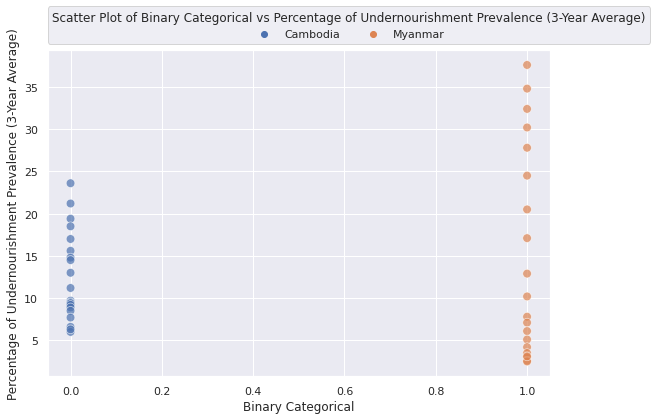

In [167]:
# Scatter Plot of Binary Categorical vs Percentage of Undernourishment Prevalence (3-Year Average)
# ALL DATA SET

sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Binary Categorical", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df, 
                hue="Country", s=75, alpha=0.7)
myplot.legend(title = "Scatter Plot of " + "Binary Categorical" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

#### GDP per Capita (USD) vs Percentage of Undernourishment Prevalence (3-Year Average)

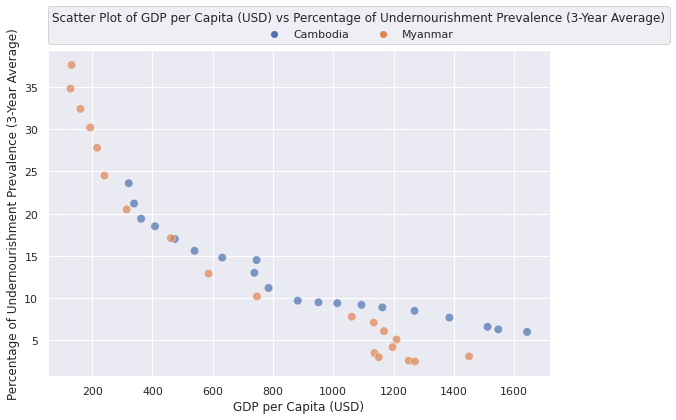

In [168]:
# Scatter Plot of GDP per Capita (USD) vs Percentage of Undernourishment Prevalence (3-Year Average)
# ALL DATA SET 
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "GDP per Capita (USD)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df, 
                hue="Country", s=75, alpha=0.7)
myplot.legend(title = "Scatter Plot of " + "GDP per Capita (USD)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

#### Annual Inflation Rate (%) vs Percentage of Undernourishment Prevalence (3-Year Average)

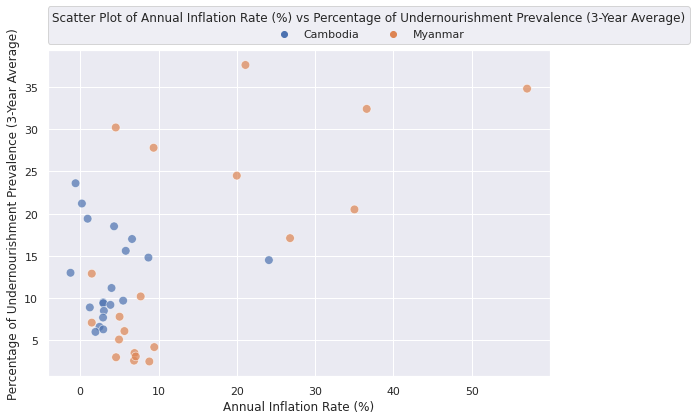

In [169]:
# Annual Inflation Rate (%) vs Percentage of Undernourishment Prevalence (3-Year Average)
# ALL DATA SET 
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Annual Inflation Rate (%)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df, 
                hue="Country", s=75, alpha=0.7)
myplot.legend(title = "Scatter Plot of " + "Annual Inflation Rate (%)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

#### Food Production Index (2014-2016 = 100) vs Percentage of Undernourishment Prevalence (3-Year Average)

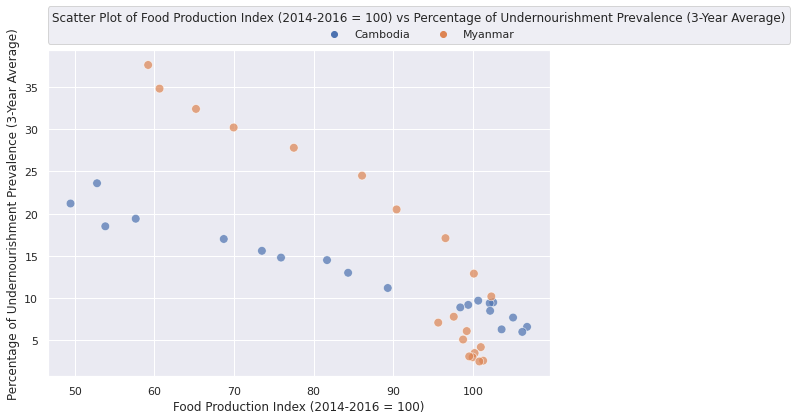

In [170]:
# Food Production Index (2014-2016 = 100) vs Percentage of Undernourishment Prevalence (3-Year Average)
# ALL DATA SET 
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Food Production Index (2014-2016 = 100)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df, 
                hue="Country", s=75, alpha=0.7)
myplot.legend(title = "Scatter Plot of " + "Food Production Index (2014-2016 = 100)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

## Building Model

Describe your model. Is this Linear Regression or Logistic Regression? Put any other details about the model. Put the codes to build your model.

### Calculating Initial Cost

$J\left(\hat{\beta}_0, \hat{\beta}_1\right)=\frac{1}{2 m} \sum_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) \times\left(\hat{y}\left(x^i\right)-y^i\right)$

In [171]:
# Multiple Variables Cost Function
# Set the value of Beta (same size as features added by column vector of 1)
beta_multiple = np.zeros(((X.shape[1]), 1)) #NumPy 1D
J = compute_cost(X, target, beta_multiple)
print(J)

[[122.54625]]


### Model Coefficients and Cost After Multiple Iterations

$\hat{\beta}_0=\hat{\beta}_0-\alpha \frac{1}{m} \Sigma_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) x_0^i$
<br>

$\hat{\beta}_1=\hat{\beta}_1-\alpha \frac{1}{m} \Sigma_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) x_1^i$
<br>

$\hat{\beta}_2=\hat{\beta}_2-\alpha \frac{1}{m} \sum_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) x_2^i$
<br>

$\cdots$
<br>

$\hat{\beta}_n=\hat{\beta}_n-\alpha \frac{1}{m} \sum_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) x_n^i$
<br>

In [172]:
# Beta After Iterations and J After Iterations
# Set the value of Iterations, Alpha, and Beta
alpha = 0.01
iterations = 1500
beta_multiple = np.zeros(((X.shape[1]), 1))

# Call the gradient_descent function
beta_multiple, J_storage_multiple = gradient_descent(X, target, beta_multiple, alpha, iterations)
print(beta_multiple)

[[13.17499626]
 [ 0.35070389]
 [-5.13143412]
 [ 1.16119909]
 [-2.46487031]]


No handles with labels found to put in legend.


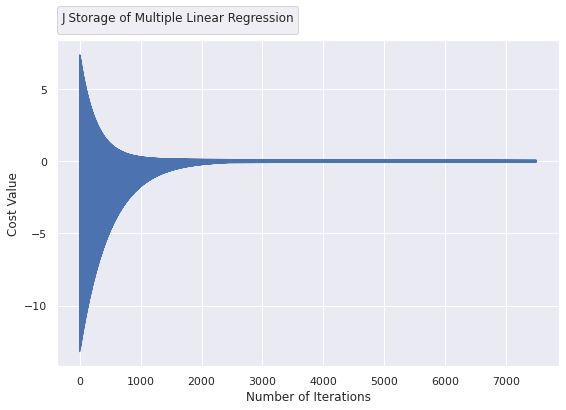

In [173]:
# Plot the graph of Cost Value in each iteration
sns.set()
myplot = sns.lineplot(x=(np.linspace(start=0, stop=len(J_storage_multiple), num=len(J_storage_multiple), endpoint=False)), y=J_storage_multiple)
myplot.set_xlabel('Number of Iterations')
myplot.set_ylabel('Cost Value')
myplot.legend(title = "J Storage of Multiple Linear Regression", 
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

### Intuitive Analysis of Model Coefficiencts

Intercept = 13.17

GDP per Capita (USD) coefficient: -5.13 (gdp increases, undernourishment decreases) indirectly proportional 

Annual Inflation Rate (%) coefficient: 1.16 (inflation increases, undernourishment increases) directly proportional 

Gross per capita Production Index Number (2014-2016 = 100) coefficient: -2.46 (agricultural production increases, undernourishment decreases) indirectly proportional


$\mathbf{X}=\left[\begin{array}{cccc}1 & x_1^1 & \ldots & x_n^1 \\ 1 & x_1^2 & \ldots & x_n^2 \\ \ldots & \ldots & \ldots & \ldots \\ 1 & x_1^m & \ldots & x_n^m\end{array}\right] \in \mathbb{R}^{m \times(n+1)}$

$\hat{\mathbf{b}}=\left[\begin{array}{c}\hat{\beta}_0 \\ \hat{\beta}_1 \\ \cdots \\ \hat{\beta}_n\end{array}\right] \in \mathbb{R}^{n+1}$

$\hat{\mathbf{y}}=\mathbf{X} \times \hat{\mathbf{b}}$

In [174]:
# Predicted Value
# Call the predict() method to get the predicted value of Feature Test
pred = predict(df_features_test, beta_multiple) #NumPy 1D
display(pred)

array([[20.79351752],
       [ 6.50075108],
       [10.99367766],
       [26.79523642],
       [12.82301609],
       [ 7.27461179],
       [20.21188228],
       [ 6.3503862 ],
       [29.50615341],
       [ 5.53880542],
       [16.76939911],
       [ 5.2657149 ],
       [ 5.25001583],
       [ 6.12764085],
       [21.90535443],
       [ 8.6937772 ]])

### Improvement Iterations in Our Model

Prevalence of undernourishment has data from 2000 - 2021. Thus, we had 40 records for our two target countries. Due to our limited dataset, the diversity of training data played a huge role.  We made efficient use of the limited data at hand to get the best possible adjusted r2 value and lowest standard error of regression by creating a function to find the best random seed value and therefore, the most diverse training data set. This in turn gave us a good adjusted r2 value and reduced standard error. 

We also experimented with different ratios of training and test data sets. 


In [175]:
# ### finding best seed value with test_size=0.4 (After testing, we found that test_size=0.4 gave us best results)
# ls_result = []
# max_result = 0
# seed_val = 0
# for val in range(999):
#     # Split the data set into training and test
#     df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=val, test_size=0.4) #DataFrame

#     # Normalize the features train using z normalization
#     df_features_train_z = normalize_z(df_features_train) #DataFrame

#     # Prepare the features train and target train to a NumPy
#     X = prepare_feature(df_features_train_z) #NumPy 5D
#     target = prepare_target(df_target_train) #NumPy 1D
#     # Beta After Iterations and J After Iterations
#     # Set the value of Iterations, Alpha
#     alpha = 0.01
#     iterations = 1500

#     # Call the gradient_descent function
#     beta_multiple, J_storage_multiple = gradient_descent(X, target, beta_multiple, alpha, iterations)
#     adjusted_r2 = adjusted_r2_score(y=prepare_target(df_target_test), ypred=pred, p=len(features))
#     ls_result.append(adjusted_r2)
#     if max(ls_result)>max_result:
#         max_result = max(ls_result)
#         seed_val = val   

# print("max adjusted r-squared:",max_result)
# print("corresponding seed value:", seed_val)

# RESULT
# max adjusted r-squared: 0.8742239115394154
# corresponding seed value: 99

### Predicting Value of Target Using Trained Model on Test Dataset

In [176]:
# Index used in test dataset after splitting data
df_plot_index = list(df_features_test.index)

In [177]:
# Comparing Real Value of Test Dataset vs Predicted Value of Test Dataset
df_compare_target_predict = df.loc[df_plot_index, ["Country", "Year", "Percentage of Undernourishment Prevalence (3-Year Average)"]]
df_compare_target_predict["Predicted Percentage of Undernourishment Prevalence (3-Year Average)"] = pred.copy()
df_compare_target_predict = df_compare_target_predict.sort_index(ascending=True)
display(df_compare_target_predict)
df_compare_target_predict = df_compare_target_predict.reset_index(drop=True)
df_compare_target_predict["Features"] = (np.linspace(1, len(df_compare_target_predict), num=len(df_compare_target_predict))).astype(int)

max_val_target_predict = df_compare_target_predict.loc[:, ["Percentage of Undernourishment Prevalence (3-Year Average)", "Predicted Percentage of Undernourishment Prevalence (3-Year Average)"]].max(axis=0)
max_val_target_predict = max(max_val_target_predict.tolist())

,Country,Year,Percentage of Undernourishment Prevalence (3-Year Average),Predicted Percentage of Undernourishment Prevalence (3-Year Average)
10,Cambodia,2011,9.7,8.693777
13,Cambodia,2014,9.2,6.350386
14,Cambodia,2015,8.9,5.538805
21,Myanmar,2002,34.8,29.506153
22,Myanmar,2003,32.4,26.795236
24,Myanmar,2005,27.8,21.905354
25,Myanmar,2006,24.5,20.793518
26,Myanmar,2007,20.5,20.211882
27,Myanmar,2008,17.1,16.769399
28,Myanmar,2009,12.9,12.823016


Text(12.200003812501192, 32.83018867924528, 'Blue: Real Value')

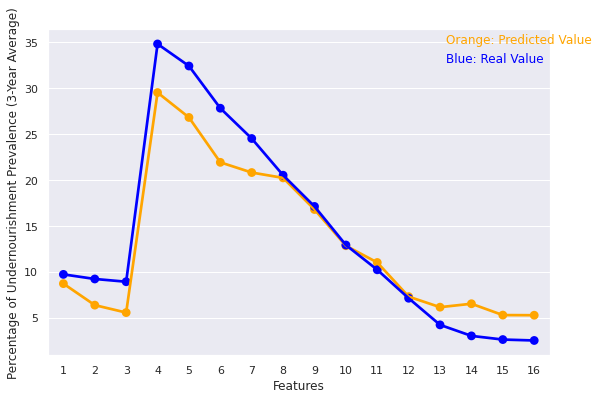

In [178]:
sns.set(rc={'figure.figsize':(9,6)})
sns.pointplot(data=df_compare_target_predict,
            x="Features", y="Predicted Percentage of Undernourishment Prevalence (3-Year Average)", 
            color="orange", label="Real Value")
#plt.annotate("Real Value", (9.4, 8))
sns.pointplot(data=df_compare_target_predict, 
            x="Features", y="Percentage of Undernourishment Prevalence (3-Year Average)", 
            color="blue")
plt.annotate("Orange: Predicted Value", 
            xy=(len(df_compare_target_predict)/1.311475, 1.0027*max_val_target_predict),
            color="orange")
plt.annotate("Blue: Real Value", 
            xy=(len(df_compare_target_predict)/1.311475, max_val_target_predict/1.06),
            color="blue")

### Combining Dataset for Easier Visualization

In [179]:
# Make a new DataFrame for easier visualization

# 1st DataFrame for Real Value
df_plot_1 = df.loc[df_plot_index, :]
real_value_target = df_plot_1.pop("Percentage of Undernourishment Prevalence (3-Year Average)")
df_plot_1["Percentage of Undernourishment Prevalence (3-Year Average)"] = real_value_target
df_plot_1["Value Type"] = ""
df_plot_1.loc[:, "Value Type"] = "Real Value"

# 2nd DataFrame for Predicted Value
df_plot_2 = df.loc[df_plot_index, :]
df_plot_2.pop("Percentage of Undernourishment Prevalence (3-Year Average)")
predicted_value_target = pred
df_plot_2["Percentage of Undernourishment Prevalence (3-Year Average)"] = predicted_value_target
df_plot_2["Value Type"] = ""
df_plot_2.loc[:, "Value Type"] = "Predicted Value"

# Combine Together 1st DataFrame w/ 2nd DataFrame
df_plot = pd.DataFrame(pd.concat([df_plot_1, df_plot_2]))
df_plot = df_plot.sort_index(ascending=True)
display(df_plot)
print(df_plot.shape)

,Country,Year,Binary Categorical,GDP per Capita (USD),Annual Inflation Rate (%),Food Production Index (2014-2016 = 100),Percentage of Undernourishment Prevalence (3-Year Average),Value Type
10,Cambodia,2011,0,882.275614,5.478447,100.67,9.700000,Real Value
10,Cambodia,2011,0,882.275614,5.478447,100.67,8.693777,Predicted Value
13,Cambodia,2014,0,1093.495976,3.855689,99.42,6.350386,Predicted Value
13,Cambodia,2014,0,1093.495976,3.855689,99.42,9.200000,Real Value
14,Cambodia,2015,0,1162.904995,1.223932,98.42,5.538805,Predicted Value
14,Cambodia,2015,0,1162.904995,1.223932,98.42,8.900000,Real Value
21,Myanmar,2002,1,128.099702,57.074511,60.64,29.506153,Predicted Value
21,Myanmar,2002,1,128.099702,57.074511,60.64,34.800000,Real Value
22,Myanmar,2003,1,161.055524,36.589718,65.22,32.400000,Real Value
22,Myanmar,2003,1,161.055524,36.589718,65.22,26.795236,Predicted Value


(32, 8)


### Plotting Each Feature with Real Target and Predicted Target (All Dataset)

#### Binary Categorical vs Percentage of Undernourishment Prevalence (3-Year Average)

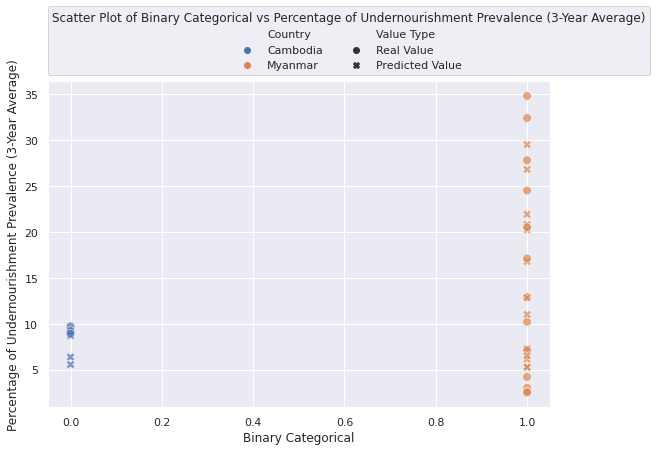

In [180]:
# Scatter Plot of Binary Categorical vs Percentage of Undernourishment Prevalence (3-Year Average)
# TARGET DATASET
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Binary Categorical", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df_plot, 
                style="Value Type", hue="Country", s=75, alpha=0.7)
myplot.legend(title = "Scatter Plot of " + "Binary Categorical" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

#### GDP per Capita (USD) vs Percentage of Undernourishment Prevalence (3-Year Average)

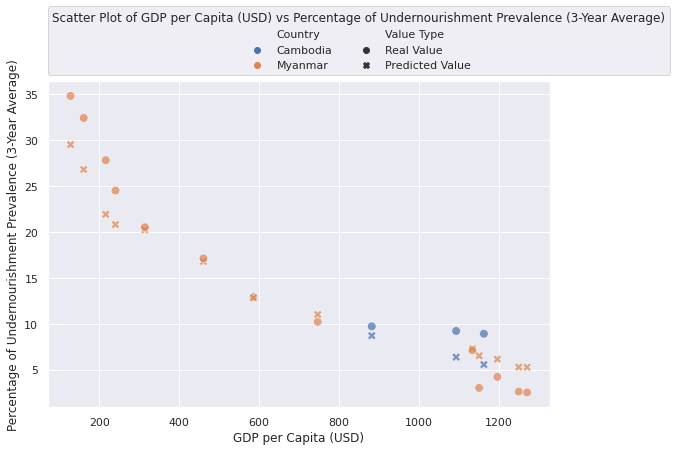

In [181]:
# Scatter Plot of GDP per Capita (USD) vs Percentage of Undernourishment Prevalence (3-Year Average)
# TARGET DATASET
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "GDP per Capita (USD)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df_plot, 
                style="Value Type", hue="Country", s=75, alpha=0.7)
myplot.legend(title = "Scatter Plot of " + "GDP per Capita (USD)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

#### Annual Inflation Rate (%) vs Percentage of Undernourishment Prevalence (3-Year Average)

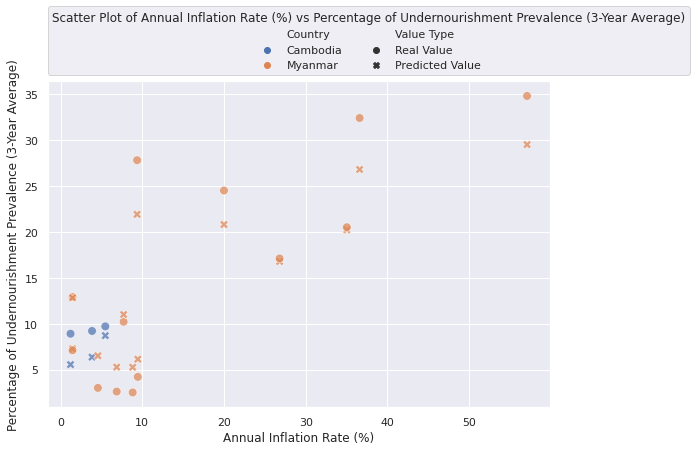

In [182]:
# Scatter Plot of Annual Inflation Rate (%) vs Percentage of Undernourishment Prevalence (3-Year Average)
# TARGET DATASET
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Annual Inflation Rate (%)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df_plot, 
                style="Value Type", hue="Country", s=75, alpha=0.7)
myplot.legend(title = "Scatter Plot of " + "Annual Inflation Rate (%)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

#### Food Production Index (2014-2016 = 100) vs Percentage of Undernourishment Prevalence (3-Year Average)

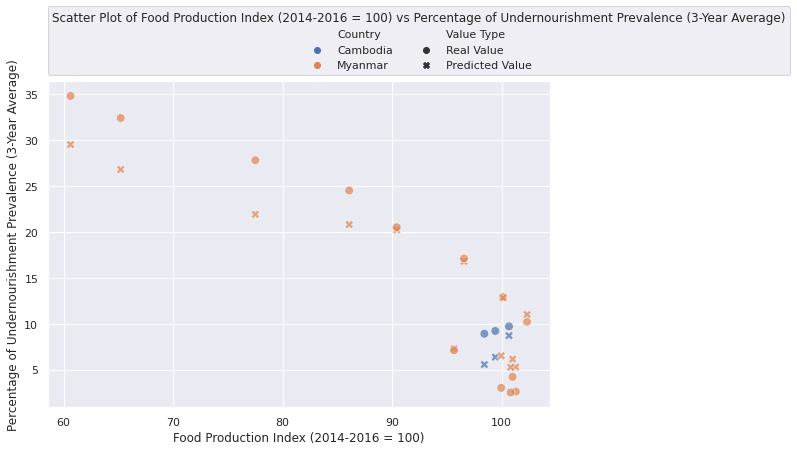

In [183]:
# Scatter Plot of Food Production Index (2014-2016 = 100) vs Percentage of Undernourishment Prevalence (3-Year Average)
# TARGET DATASET
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Food Production Index (2014-2016 = 100)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df_plot, 
                style="Value Type", hue="Country", s=75, alpha=0.7)
myplot.legend(title = "Scatter Plot of " + "Food Production Index (2014-2016 = 100)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

## Evaluating the Model

Describe your metrics and how you want to evaluate your model. Put any Python code to evaluate your model. Use plots to have a visual evaluation.

### Standard Metrics

#### Mean Squared Error (MSE)

$\mathrm{MSE}=\frac{1}{n} \sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2$

In [184]:
# # Mean Squared Error (MSE)
# mse = mean_squared_error(y=prepare_target(df_target_test), ypred=pred)
# print(mse)
# Mean Squared Error (MSE)
mse = mean_squared_error(prepare_target(df_target_test), pred)
print(mse)

9.990736660164742


#### Coefficient of Determination (R²)

$R^2=1-\frac{S S_{R E S}}{S S_{T O T}}=1-\frac{\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2}{\sum_{i=1}^n\left(y_i-\bar{y}\right)^2}$

In [185]:
# Coefficient of Determination (R²)
# Calculate r2 score by calling a function, the arguments must be a NumPy
r2 = r2_score(prepare_target(df_target_test), pred)
print(r2)

0.9077642017955713


### Relevant Metrics

#### Adjusted Coefficient of Determination (Adjusted R²)

We cannot use R² to evaluate multiple linear regression due to the following issues 
1. Every time we add a predictor to a model, the R-squared increases, even if due to chance alone. It never decreases. Consequently, a model with more terms may appear to have a better fit simply because it has more terms.
2. If a model has too many predictors and higher order polynomials, it begins to model the random noise in the data. This leads to overfitting the model and it produces misleadingly high R-squared values and a lessened ability to make predictions.

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. Adjusted R-squared helps us determine how much of the correlation with the index is due to the addition of those variables. The adjusted R-squared compensates for the addition of variables and only increases if the new predictor enhances the model.
(Side note: The Adjusted R2 Score is an extension of the R2 Score that takes into account sample size and the number of independent variables. Hence, it is possible for it to return zero or negative values in the event of a lack of data when doing regression)


$R_{a d j}^2=1-\frac{\left(1-R^2\right)(n-1)}{n-p-1}$
<br>
<br>
$n:\:number\:of\:dataset$
<br>
$p:\:number\:of\:features$
<br>

In [186]:
# Adjusted Coefficient of Determination (Adjusted R²)
# Calculate adjusted r2 score by calling a function, the arguments must be a NumPy for y and ypred
# p is the number of Independent Variables, which are the length of Features list
adjusted_r2 = adjusted_r2_score(y=prepare_target(df_target_test), ypred=pred, p=len(features))
print(adjusted_r2)

0.8742239115394154


#### Standard Error of Regression (S)

In addition to the adjusted R-squared metric, we also used standard error or regression.


The standard error of the regression (S), represents the average distance that the observed values fall from the regression line. S is in the units of the dependent variable.


It is particularly useful because we can use it to assess the precision of predictions. Roughly 95% of the observation should fall within +/- two standard errors of the regression, which is a quick approximation of a 95% prediction interval.

$S =\sqrt{1-R_{a d j}^2}\cdot S.D$

$S.D=\sqrt{\frac{\sum_{i=1}^n\left(x_i-\bar{x}\right)^2}{n-1}}$

In [187]:
# Standard Error of Regression (S)
# p is the number of Independent Variables, which are the length of Features list
std_eror_reg = std_error_reg_score(y=prepare_target(df_target_test), ypred=pred, p=len(features))
print(std_eror_reg)

0.3730853869367281


## Verifying Process with Scikit Sklearn

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [189]:
# Extract the features and the target
df_features_scikit, df_target_scikit = get_features_targets(df, ['Binary Categorical', 'GDP per Capita (USD)', 'Annual Inflation Rate (%)', 'Food Production Index (2014-2016 = 100)'], ['Percentage of Undernourishment Prevalence (3-Year Average)'])

# Normalize the features train using z normalization
df_features_scikit = normalize_z(df_features_scikit)

# Split the data into training and test data set using scikit-learn function
df_features_train_scikit, df_features_test_scikit, df_target_train_scikit, df_target_test_scikit = train_test_split(df_features_scikit, df_target_scikit, test_size=0.4, random_state=99)

# Instantiate LinearRegression() object
model = LinearRegression()

# Call the fit() method and find the Beta Value
model.fit(df_features_train_scikit, df_target_train_scikit)
print(model.coef_, model.intercept_)

# Call the predict() method
pred_scikit = model.fit(df_features_train_scikit, df_target_train_scikit).predict(df_features_test_scikit)

[[ 0.32477307 -5.66203628  2.25446523 -1.60300413]] [14.3862165]


In [190]:
# Call the r2_score method and find the r2 value
print(r2_score(df_target_test_scikit, pred_scikit))

0.8759086808324694


## Improving the Model

Discuss any steps you can do to improve the models. Put any python codes. You can repeat the steps above with the codes to show the improvement in the accuracy. 

-  Adding more dataset to improve precision of the model
    1. More countries
    2. More years
-  Adding more features that is relevant to improve accuracy of the model
-  Adding more targets to better analyse and predict food security and food safety
-  Adding interactive window with input() function to allow one to choose which features and targets one wants to model and select what types of graphs one wishes to see
-  Using more Python library such as TensorFlow to get the derivatives of the Cost Function, instead of using Gradient Descent


## Discussion and Analysis

Discuss your model and accuracy in solving the problem. Analyze the results of your metrics. Put any conclusion here.

Our model has pretty good accuracy in predicting Percentage of Prevalence of Undernourishment with adjusted r-squared value = 0.8742239115394154 and Standard error of regression (S) = 0.3730853869367281. Percentage of Prevalence of Undernourishment gives us information about the food security of the country. With this data we can predict food security of the country in the future and take necessary steps and prepare in advance to avoid low levels of food security. 